## **PROBLEME IV - CLASSIFICATION**


> **Question 1: Analyse exploratoire**




In [ ]:
import pandas as pd

# Load the data from the uploaded file
file_path = '/content/HD_Complete_Data.csv'
data = pd.read_csv(file_path, delimiter=";")
data.head()

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Nous avons 918 observations de 11 variables explicatives :

*   **Age** : L'âge du patient (numérique entier)
*   **Sexe** : Le sexe du patient (M ou F) (catégorielle)
*   **ChestPainType** : Type de douleur thoracique (par exemple, ATA, NAP, ASY)(catégorielle)
*   **RestingBP** : Pression artérielle au repos (continue)
*   **Cholesterol** : Taux de cholestérol (continue)
*   **FastingBS** : Glycémie à jeun (0 = non, 1 = oui) (catégorielle)
*   **RestingECG** : Résultats de l'électrocardiogramme au repos (catégorielle)
*   **MaxHR** : Fréquence cardiaque maximale atteinte (continue)
*   **ExerciseAngina** : Angine de poitrine induite par l'exercice (caégorielle avec N = non, Y = oui)
*   **Oldpeak** : Dépression du segment ST induite par l'exercice par rapport au repos (continue). Cette valeur est égale à 0 lorsque normale, négative s'il y a une élévation du segment et positive si il y a une baisse du segment à l'ECG.
*   **ST_Slope** : Pente du segment ST d'effort (catégorielle)

Ces varibles semblent être toutes des facteurs de risque cardiovasculaires.

Justement, celles-ci permettent ici de prédire si oui ou non il y a une maladie cardiaque :
*   **HeartDisease** : Présence de maladie cardiaque (0 = non, 1 = oui)

In [ ]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


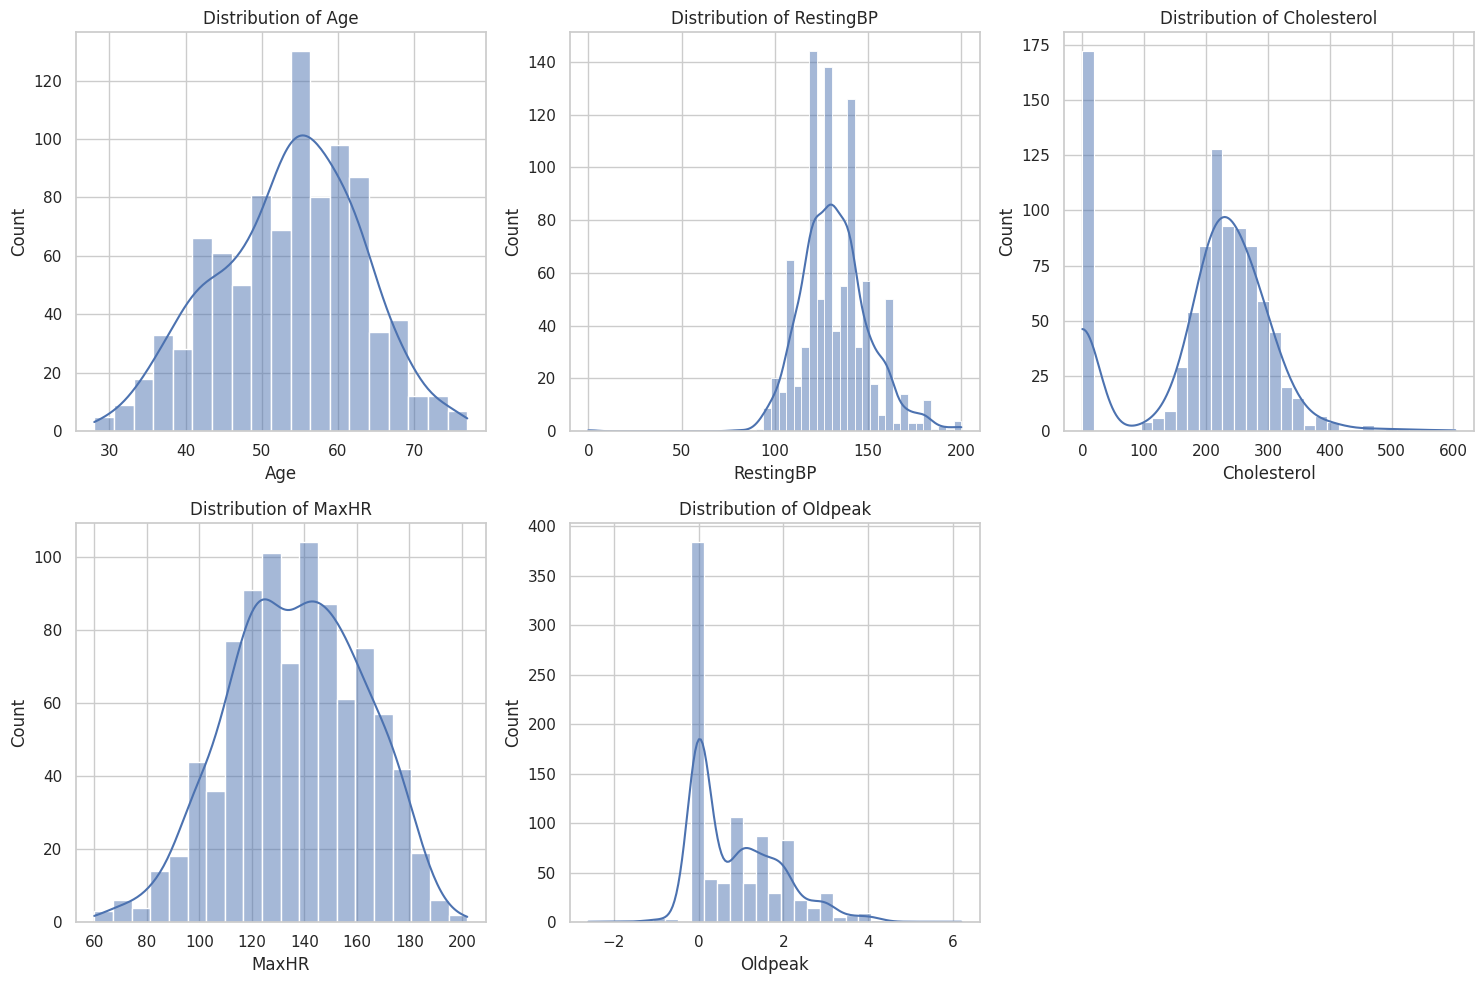

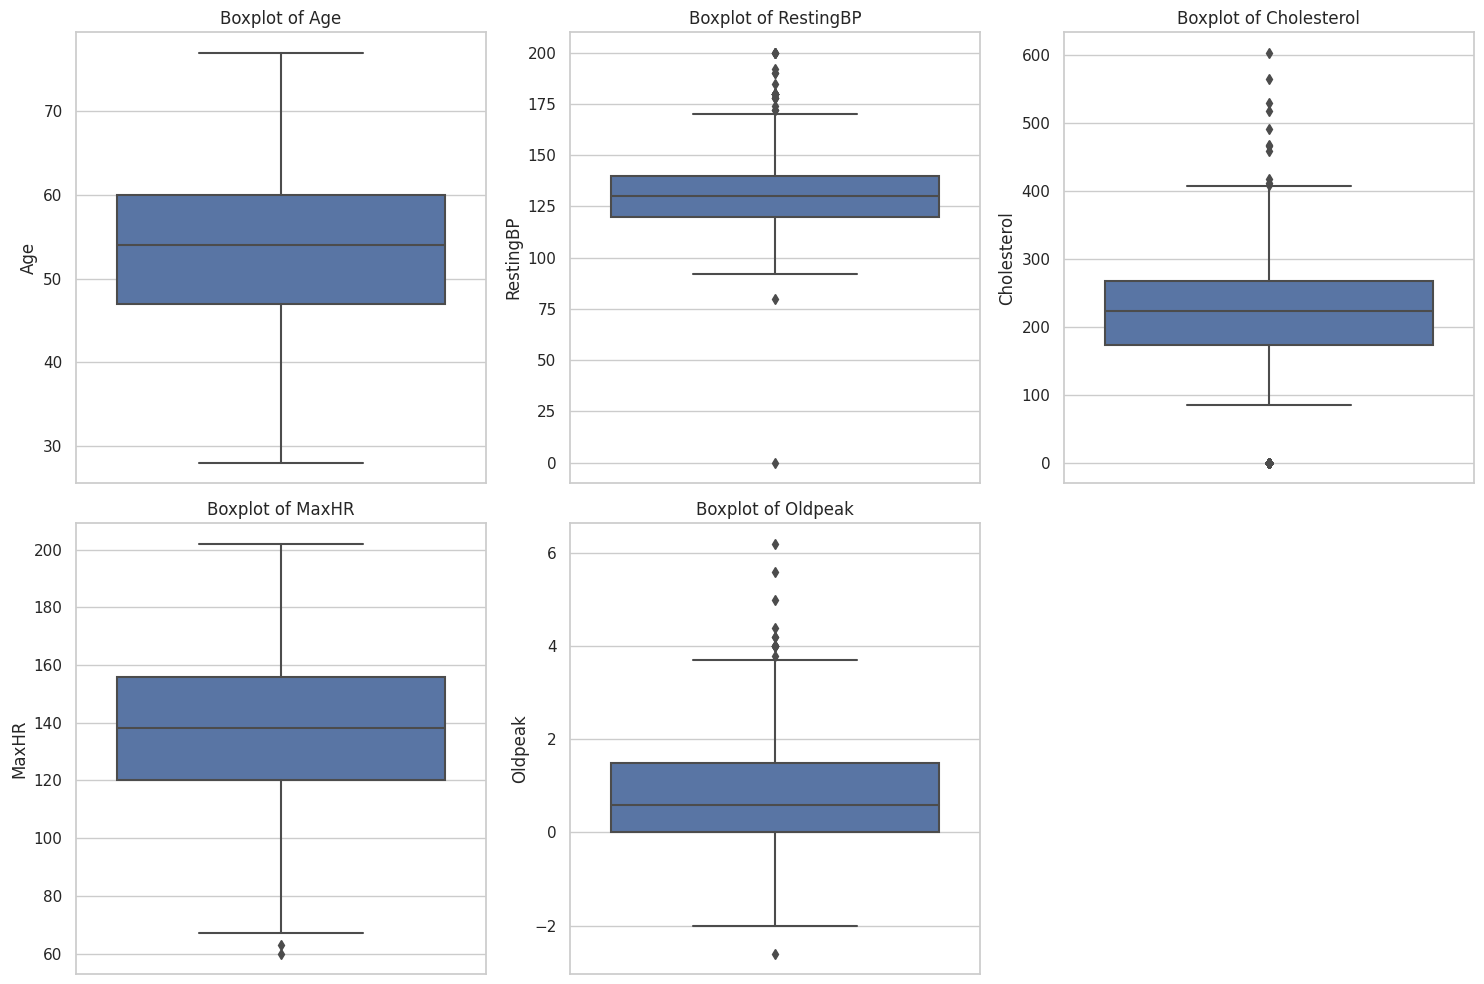

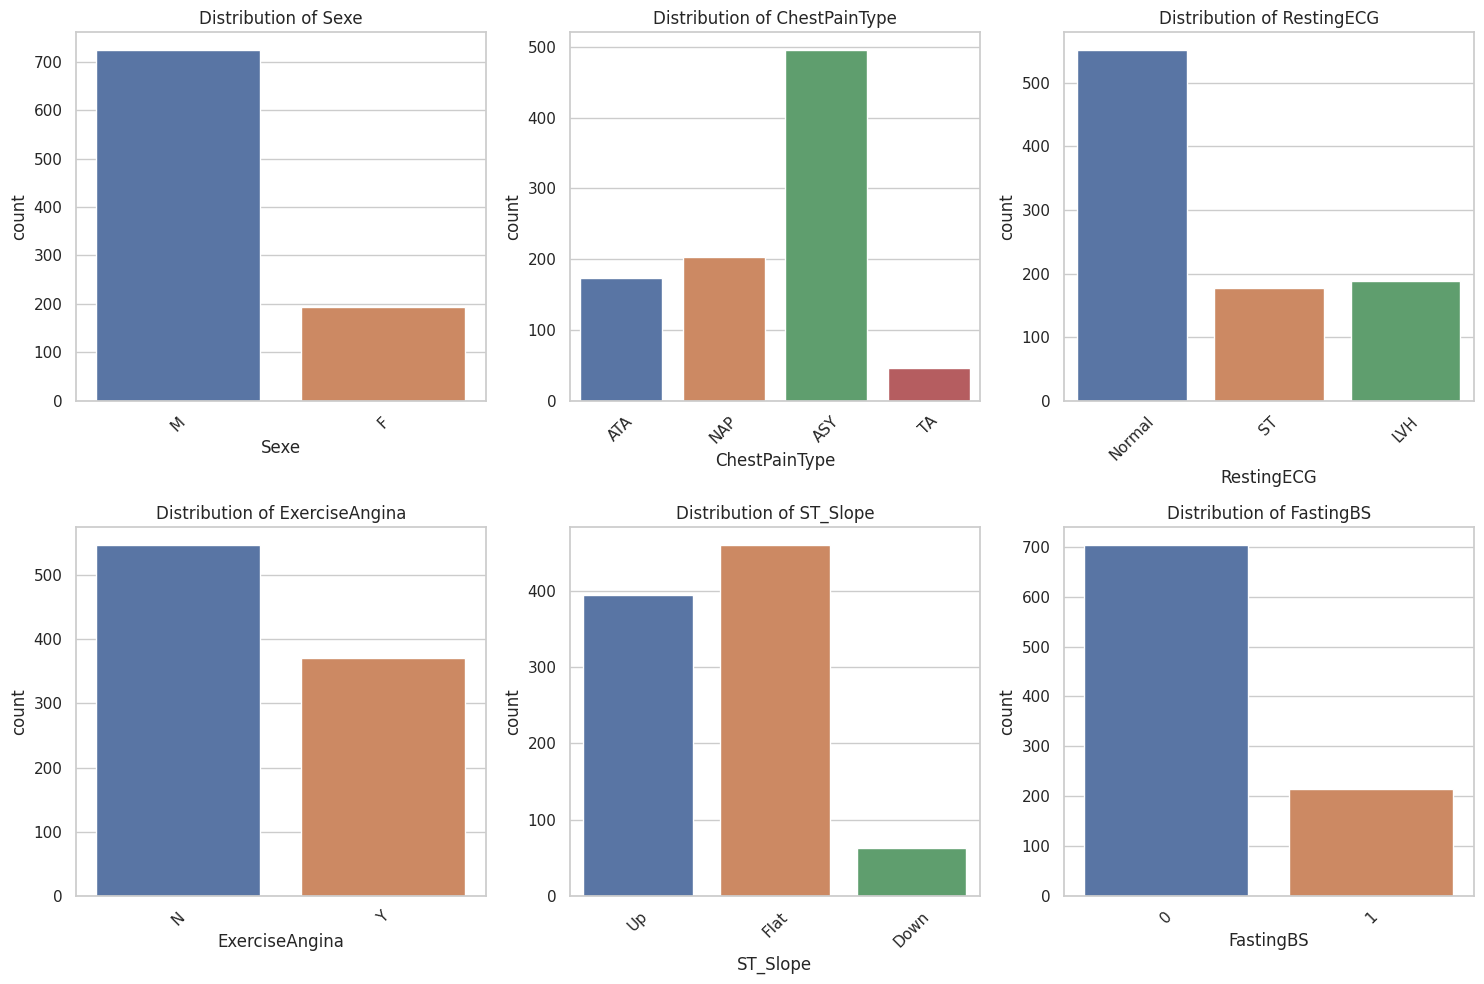

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuration des paramètres de style pour les graphiques
sns.set(style="whitegrid")

# Création d'histogrammes pour les variables numériques
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()

plt.show()

# Création de boxplots pour les variables numériques
plt.figure(figsize=(15, 10))

for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()

plt.show()

# Création de visualisations pour la répartition des catégories pour les variables catégorielles
cat_cols = ['Sexe', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'FastingBS']

plt.figure(figsize=(15, 10))

for i, col in enumerate(cat_cols):
    plt.subplot(2, 3, i + 1)
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.show()

Il semble que certaines valeurs soient manquantes pour la catégorie cholestérol. En effet, nous avons beaucoup de valeurs égales à 0, ce qui n'est pas pertinent cliniquement.

**Répartition Démographique et Clinique:**

* Sexe: prédominance masculine dans l'échantillon, ce qui pourrait influencer l'interprétation des résultats, en particulier dans les études de risques liés aux maladies cardiaques.
* Distribution de l'âge: Concentration autour de la cinquantaine, une période de la vie souvent associée à une augmentation des risques cardiaques.


**Indicateurs de Santé Cardiovasculaire:**

* Pression Artérielle (RestingBP): La distribution montre que la plupart des individus ont une pression artérielle dans une plage normale, mais des valeurs extrêmes suggèrent des cas de tension très élevée.
* Cholestérol: Variabilité notable, avec certaines valeurs extrêmement élevées, ce qui peut indiquer un risque accru de maladies cardiovasculaires.
*Fréquence Cardiaque Maximale (MaxHR): Distribution relativement normale, importante dans l'évaluation de la capacité cardiovasculaire et du risque de maladies cardiaques.
* Types de douleur thoracique: La catégorie "ASY" est la plus fréquente.
* Glycémie à jeun: Une majorité d'individus avec des niveaux normaux de glycémie, ce qui est un bon indicateur de santé générale.


**État de Santé Cardiaque (HeartDisease):**

Répartition presque équilibrée entre les individus avec et sans maladie cardiaque, ce qui rend cet échantillon particulièrement pertinent pour étudier les facteurs de risque cardiaque.

> **Question 2: Standardisation des données**

Dans le cadre de l'implémentation d'un réseau de neurones, oui nous allons standardiser les données car celles-ci ont des échelles différentes. Cela est plus judicieux pour s'assurer que chaque variable contribue de maniere équitable au modele mais également pour améliorer les performances et la stabilité du processus d'apprentissage.

> Nous allons également nous occuper des valeurs extrêmes (égales à 0) dans la variable choleterol.

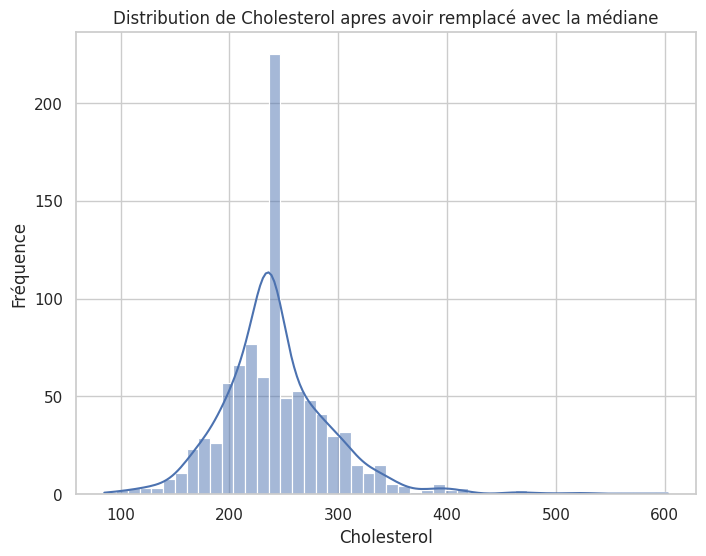

In [ ]:
# Calcul de la médiane du cholestérol, en excluant les valeurs à 0
cholesterol_median = data[data['Cholesterol'] != 0]['Cholesterol'].median()

# Remplacement des valeurs à 0 par la médiane calculée
data['Cholesterol'] = data['Cholesterol'].replace(0, cholesterol_median)

# Création d'un nouvel histogramme pour visualiser la distribution du cholestérol après le remplacement par la médiane
plt.figure(figsize=(8, 6))
sns.histplot(data['Cholesterol'], kde=True)
plt.title('Distribution de Cholesterol apres avoir remplacé avec la médiane')
plt.xlabel('Cholesterol')
plt.ylabel('Fréquence')
plt.show()

Cette solution n'est pas idéale car elle induit un pic trop important au niveau de la médiane car le nombre de 0 est important.

> Nous allons donc essayer la régression.

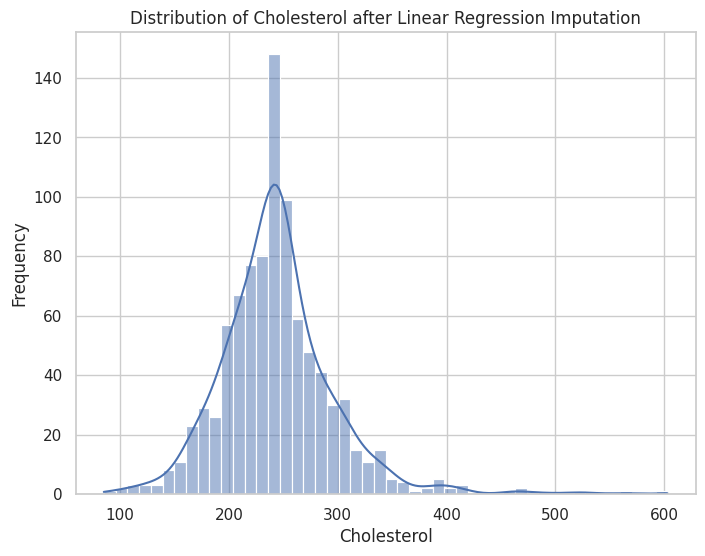

In [ ]:
from sklearn.linear_model import LinearRegression

#On recharge nos données
data = pd.read_csv(file_path, delimiter=";")

# Définition des variables prédictives
predictor_vars = ['Age', 'RestingBP', 'MaxHR']

# Séparation des données en deux ensembles
data_with_cholesterol = data[data['Cholesterol'] > 0]
data_without_cholesterol = data[data['Cholesterol'] == 0]

# Création et entraînement du modèle de régression linéaire
lin_reg_model = LinearRegression()
lin_reg_model.fit(data_with_cholesterol[predictor_vars], data_with_cholesterol['Cholesterol'])

# Prédiction des valeurs de cholestérol pour les données avec cholestérol à 0
cholesterol_predictions = lin_reg_model.predict(data_without_cholesterol[predictor_vars])

# Remplacement des valeurs à 0 dans les données par les valeurs prédites
data.loc[data['Cholesterol'] == 0, 'Cholesterol'] = cholesterol_predictions

# Création d'un histogramme pour visualiser la distribution du cholestérol après l'imputation par régression linéaire
plt.figure(figsize=(8, 6))
sns.histplot(data['Cholesterol'], kde=True)
plt.title('Distribution of Cholesterol after Linear Regression Imputation')
plt.xlabel('Cholesterol')
plt.ylabel('Frequency')
plt.show()

Ceci semble plus correct.

Nous avons un 0 dans restingBP qui peut-être ignoré puisqu'il est seul.

> Nous pouvons donc désormais standardiser les données numériques.

In [ ]:
from sklearn.preprocessing import StandardScaler

# Création de l'objet StandardScaler
scaler = StandardScaler()

# Standardisation des données numériques
data[num_cols] = scaler.fit_transform(data[num_cols])

# Affichage des premières lignes des données standardisées pour vérification
data.head()

,Age,Sexe,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,-1.433140,M,ATA,0.410909,0.832484,0,Normal,1.382928,N,-0.832432,Up,0
1,-0.478484,F,NAP,1.491752,-1.209054,0,Normal,0.754157,N,0.105664,Flat,1
2,-1.751359,M,ATA,-0.129513,0.720106,0,ST,-1.525138,N,-0.832432,Up,0
3,-0.584556,F,ASY,0.302825,-0.572244,0,Normal,-1.132156,Y,0.574711,Flat,1
4,0.051881,M,NAP,0.951331,-0.928109,0,Normal,-0.581981,N,-0.832432,Up,0


> Maintenant les données catégorielles

Pour la variable binaire Sexe nous allons utiliser un encodage binaire (comme pour FastingBS) : 0 pour M, 1 pour F.

Pour le reste des variables nous allons utiliser l'encodage OneHot.

In [ ]:
# Encodage binaire pour la variable 'Sexe'
data['Sexe'] = data['Sexe'].map({'M': 0, 'F': 1})

# Encodage one-hot pour les autres variables catégorielles
cat_cols = ['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
data = pd.get_dummies(data, columns=cat_cols)

data.head()

,Age,Sexe,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,-1.433140,0,0.410909,0.832484,0,1.382928,-0.832432,0,0,1,0,0,0,1,0,1,0,0,0,1
1,-0.478484,1,1.491752,-1.209054,0,0.754157,0.105664,1,0,0,1,0,0,1,0,1,0,0,1,0
2,-1.751359,0,-0.129513,0.720106,0,-1.525138,-0.832432,0,0,1,0,0,0,0,1,1,0,0,0,1
3,-0.584556,1,0.302825,-0.572244,0,-1.132156,0.574711,1,1,0,0,0,0,1,0,0,1,0,1,0
4,0.051881,0,0.951331,-0.928109,0,-0.581981,-0.832432,0,0,0,1,0,0,1,0,1,0,0,0,1


> **Question 3: Division des données**

In [ ]:
from sklearn.model_selection import train_test_split

target_var = 'HeartDisease'

# Séparation des variables indépendantes (features) et de la variable dépendante (target)
X = data.drop(target_var, axis=1)  # Toutes les colonnes sauf la variable dépendante
y = data[target_var]  # La variable dépendante

# Division des données en ensembles d'apprentissage et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

# Vérification des dimensions des ensembles obtenus
print("Taille de l'ensemble d'apprentissage :", X_train.shape)
print("Taille de l'ensemble de test :", X_test.shape)

Taille de l'ensemble d'apprentissage : (734, 19)
Taille de l'ensemble de test : (184, 19)


> **Question 4 :**

Comme évoqué précedemment, nous avons tout d'abord identifié les variables catégorielles qui sont les suivantes : 'Sexe', 'FastingBS' 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'.

Parmis celles-ci, deux était déjà binaire 'Sexe' qui a été encodé par 0 ou 1, et 'FastingBS' qui n'a pas été modifié.

Nous avons ensuite utilisé l'encodage One Hot pour séparer les sous variables et les coder en 0 ou 1.

Ces méthodes d'encodage ont permis de convertir efficacement les informations catégorielles en un format numérique sans perdre de l'information cruciale. Elles sont essentielles pour garantir que le modele de reseau de neurone traite correctement les variables catégorielles.

> **Question 5 :**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

# Conversion des labels en catégories binaires pour la variable cible
y_train_encoded = to_categorical(y_train)
y_test_encoded = to_categorical(y_test)

# Construction du modèle
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dropout(0.5))  # Dropout pour réduire le surapprentissage
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))  # Sortie binaire pour deux classes

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

from keras.callbacks import EarlyStopping

# Early stopping pour éviter le surapprentissage
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

# Entraînement du modèle
history = model.fit(X_train, y_train_encoded, epochs=100, batch_size=10,
                    validation_split=0.2, callbacks=[early_stopping], verbose=1)

# Évaluation du modèle sur les données de test
scores = model.evaluate(X_test, y_test_encoded)
print(f"Accuracy: {scores[1]*100}%")

Epoch 1/100
59/59 [==============================] - 3s 10ms/step - loss: 0.6625 - accuracy: 0.6184 - val_loss: 0.5707 - val_accuracy: 0.7755
Epoch 2/100
59/59 [==============================] - 0s 5ms/step - loss: 0.5544 - accuracy: 0.7376 - val_loss: 0.4972 - val_accuracy: 0.8095
Epoch 3/100
59/59 [==============================] - 0s 5ms/step - loss: 0.5213 - accuracy: 0.7683 - val_loss: 0.4615 - val_accuracy: 0.8299
Epoch 4/100
59/59 [==============================] - 0s 5ms/step - loss: 0.4476 - accuracy: 0.8041 - val_loss: 0.4405 - val_accuracy: 0.8095
Epoch 5/100
59/59 [==============================] - 0s 4ms/step - loss: 0.4043 - accuracy: 0.8382 - val_loss: 0.4334 - val_accuracy: 0.8231
Epoch 6/100
59/59 [==============================] - 0s 6ms/step - loss: 0.4188 - accuracy: 0.8296 - val_loss: 0.4315 - val_accuracy: 0.8367
Epoch 7/100
59/59 [==============================] - 0s 6ms/step - loss: 0.3886 - accuracy: 0.8450 - val_loss: 0.4281 - val_accuracy: 0.8435
Epoch 8/100


In [ ]:
model.summary()

Model: "sequential_100"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_348 (Dense)           (None, 64)                1280      
                                                                 
 dropout_248 (Dropout)       (None, 64)                0         
                                                                 
 dense_349 (Dense)           (None, 32)                2080      
                                                                 
 dropout_249 (Dropout)       (None, 32)                0         
                                                                 
 dense_350 (Dense)           (None, 2)                 66        
                                                                 
Total params: 3426 (13.38 KB)
Trainable params: 3426 (13.38 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


> Optimisation des hyperparametres manuellement

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
tf.get_logger().setLevel(logging.ERROR)


# Paramètres à tester
layer_options = [[64, 32], [128, 64, 32]]  # Exemple : deux architectures de couches
activation_options = ['relu', 'sigmoid']
optimizer_options = {'adam': Adam, 'sgd': SGD}
learning_rate_options = [0.001, 0.01]
batch_size_options = [16, 32]
epochs = 10

# Meilleure performance
best_accuracy = 0
best_params = {}

for layers in layer_options:
    for activation in activation_options:
        for optimizer_name, optimizer in optimizer_options.items():
            for lr in learning_rate_options:
                for batch_size in batch_size_options:
                    # Création du modèle
                    model = Sequential()
                    for i, nodes in enumerate(layers):
                        if i == 0:
                            model.add(Dense(nodes, input_dim=X_train.shape[1], activation=activation))
                        else:
                            model.add(Dense(nodes, activation=activation))
                        model.add(Dropout(0.5))
                    model.add(Dense(1, activation='sigmoid'))

                    # Compilation du modèle
                    opt = optimizer(lr=lr)
                    model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

                    # Entraînement du modèle
                    model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, verbose=0)

                    # Évaluation du modèle
                    y_pred = model.predict(X_test)
                    y_pred = (y_pred > 0.5)
                    accuracy = accuracy_score(y_test, y_pred)

                    # Mise à jour de la meilleure performance
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_params = {'layers': layers, 'activation': activation,
                                       'optimizer': optimizer_name, 'learning_rate': lr,
                                       'batch_size': batch_size}

# Affichage des meilleurs hyperparamètres
print(f"Meilleure précision: {best_accuracy}")
print(f"Meilleurs paramètres: {best_params}")

> Utilisation des hyperparemetres pour la prédiction

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt

# Reconstruction du modèle avec les meilleurs paramètres
model = Sequential()
for i, nodes in enumerate([64, 32]):
    if i == 0:
        model.add(Dense(nodes, input_dim=X_train.shape[1], activation='relu'))
    else:
        model.add(Dense(nodes, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compilation du modèle
model.compile(optimizer=Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])

# Entraînement du modèle
model.fit(X_train, y_train, batch_size=16, epochs=10, verbose=0)

# Faire des prédictions
y_pred = model.predict(X_test)
y_pred_classes = (y_pred > 0.5).astype(int)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: closure mismatch, requested ('self', 'step_function'), but source function had ()
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
6/6 [==============================] - 0s 6ms/step


> **Question 6 : réduction du surapprentissage**

Pour réduire le surapprentissage nous avons utilisé différents outils :

* **Dropout** : il s'agit d'une forme de régularisation. En "éteignant" aléatoirement des neurones pendant l'entraînement, cela empêche le réseau de devenir trop dépendant de n'importe quel neurone individuel, favorisant ainsi une généralisation plus forte.
* **Early stopping** : Elle consiste à arrêter l'entraînement dès que les performances sur l'ensemble de validation commencent à se dégrader, plutôt que de continuer jusqu'à ce que le nombre fixé d'époques soit atteint.
* **Taille de batch et nombre d'époques** : nous les avons adapté. Un nombre d'époques trop élevé peut conduire à un surapprentissage, tandis qu'une taille de batch correctement ajustée peut aider à une convergence plus stable et efficace.

> **Question 7 : évaluation de la performance de notre modele**

> Erreurs de classification et matrice de confusion

              precision    recall  f1-score   support

           0       0.85      0.80      0.83        82
           1       0.85      0.88      0.87       102

    accuracy                           0.85       184
   macro avg       0.85      0.84      0.85       184
weighted avg       0.85      0.85      0.85       184



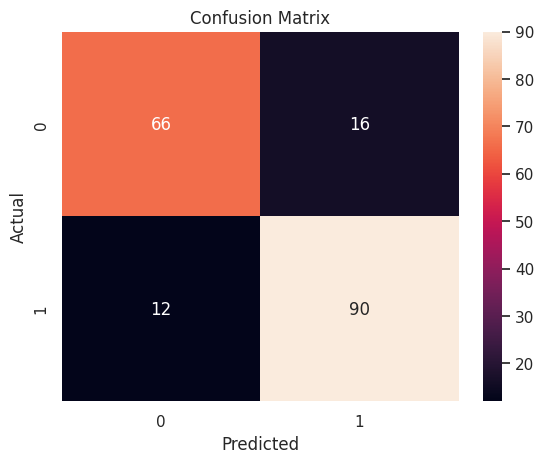

In [ ]:
# Calcul des erreurs de classification et matrice de confusion
print(classification_report(y_test, y_pred_classes))
conf_matrix = confusion_matrix(y_test, y_pred_classes)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

> Rapport de Classification

Le rapport montre les métriques de précision, de rappel (recall), de score F1 et de support pour chaque classe ainsi que des moyennes.

* Précision : La précision pour les deux classes est relativement élevée, indiquant que le modèle a bien performé pour identifier correctement les vrais positifs sur l'ensemble des prédictions positives.
* Rappel : Le rappel est également élevé, en particulier pour la classe 1, ce qui signifie que le modèle est bon pour capturer une grande proportion des cas positifs réels.
* Score F1 : Les scores F1 sont également élevés, indiquant un bon équilibre entre la précision et le rappel pour les deux classes.

> Matrice de Confusion

La matrice de confusion montre le nombre de prédictions correctes et incorrectes sous forme de tableau :

* Vrais Positifs (VP) pour la classe 0 : 66
* Faux Positifs (FP) : 16 (cas où le modèle a prédit la classe 1 alors que la classe réelle était 0)
* Vrais Positifs (VP) pour la classe 1 : 90
* Faux Négatifs (FN) : 12 (cas où le modèle a prédit la classe 0 alors que la classe réelle était 1)

Les faux négatifs peuvent être particulièrement critiques car ils peuvent retarder la prise en charge des patients reellement atteints de maladies cardiaques.

> Courbe ROC et AUC

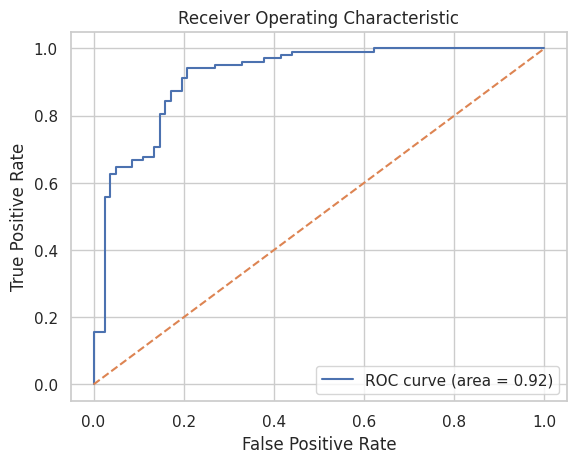

In [ ]:
# Calcul et tracé de la courbe ROC
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

La courbe ROC montre la performance du modèle à tous les seuils de classification. L'aire sous la courbe (AUC) est de 0.92, ce qui est une excellente performance, indiquant une capacité élevée du modèle à distinguer entre les classes 0 et 1.

> **Question 8 : Conclusion générale**

Notre modèle a démontré une performance élevée dans la classification du risque de cardiopathie. Les métriques de précision et de rappel sont équilibrées, ce qui est souhaitable dans un contexte médical où il est aussi important d'identifier correctement les conditions positives que d'éviter les faux positifs. L'AUC de 0.92 suggère que le modèle a une capacité discriminante forte.

La sélection des paramètres du modèle de réseau de neurones s'est avérée efficace, comme en témoigne la précision élevée obtenue lors de l'évaluation sur l'ensemble de test. Le modèle est probablement bien généralisable et devrait performer de manière similaire sur des données non vues, à condition que ces données soient représentatives de la même distribution que l'ensemble de données d'entraînement.

> **Question 9 : Comparaison avec un modele de régression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Entraînement du modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
y_pred_log_reg = log_reg.predict(X_test)

# Calcul de l'accuracy
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print(f"Accuracy of Logistic Regression: {accuracy_log_reg*100}%")

# Comparaison avec le modèle de réseau de neurones
print(f"Accuracy of Neural Network: {best_accuracy}%")

Accuracy of Logistic Regression: 89.13043478260869%
Accuracy of Neural Network: 0.907608695652174%


* **Régression Logistique** : Le modèle de régression logistique a montré une précision de 89.13%. Cette performance est remarquable étant donné la simplicité relative de la régression logistique en tant que modèle linéaire. L'avantage de ce modèle réside dans sa transparence et sa facilité à comprendre quelles caractéristiques influencent la prédiction et comment elles le font.
* **Réseau de Neurones** : notre réseau de neurones a atteint une précision d'environ 90.76%, surpassant légèrement la régression logistique. Cette amélioration de la précision indique que le réseau de neurones peut capturer des relations plus complexes dans les données. Cependant, cette complexité supplémentaire vient avec une diminution de la transparence et une augmentation du risque de surajustement, malgré les mesures prises pour l'atténuer.

Dans un contexte médical, où chaque prédiction erronée peut avoir des conséquences importantes, il est essentiel de peser la précision contre l'interprétabilité. La régression logistique offre une voie plus claire pour comprendre les décisions du modèle, ce qui peut être crucial pour la validation clinique et la confiance des praticiens.

L'analyse des métriques autres que la précision, comme la spécificité et la sensibilité des deux modeles, est également importante. Pour les maladies cardiaques, minimiser les faux négatifs (manquer de diagnostiquer une maladie cardiaque) est plus important que de minimiser les faux positifs, puisque d'autres examens complémentaires seront réalisés à la suite de cette premiere évaluation des risques cardiovasculaires.

En conclusion, bien que le réseau de neurones ait démontré une précision supérieure, la décision d'utiliser ce modèle doit être soigneusement considérée dans le contexte plus large des besoins cliniques, des ressources disponibles, et des exigences réglementaires.

# **Problème V : Analyse d'une série temporelle**



**Importation des librairies**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense

**Première visualisation et analyse des données**

            Ammonium
Months              
1996-01-01  0.253333
1996-02-01  0.218889
1996-03-01  0.242000
1996-04-01  0.134545
1996-05-01  0.113333


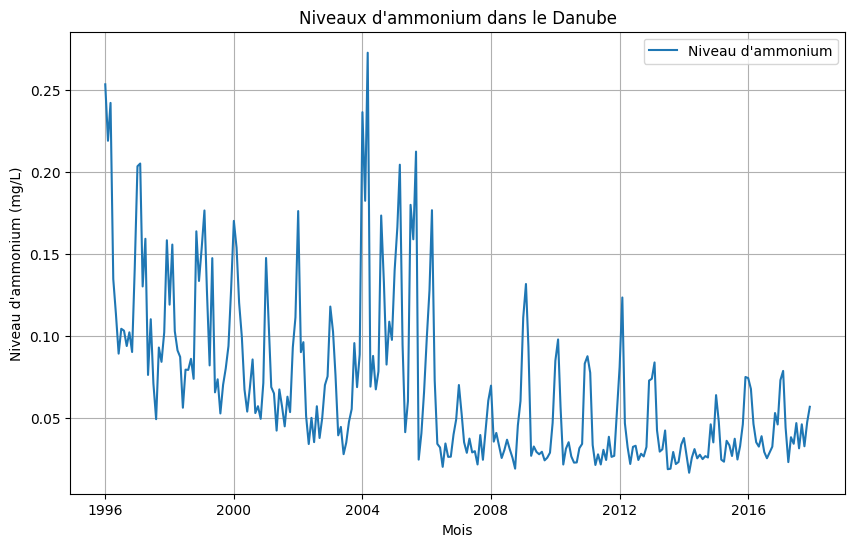

In [ ]:
# Chemin d'accès au fichier CSV
chemin_fichier_csv = 'Danube.csv'

# Charger le fichier CSV
donnees = pd.read_csv(chemin_fichier_csv, delimiter=';', parse_dates=['Months'], dayfirst=True)

# Remplacer les virgules par des points et convertir en nombres décimaux
donnees['Ammonium'] = donnees['Ammonium'].str.replace(',', '.').astype(float)
donnees['Months'] = pd.to_datetime(donnees['Months'], format='%m/%d/%Y')
donnees.set_index('Months', inplace=True)
# Afficher les premières lignes pour vérifier les modifications
print(donnees.head())

# Tracer la série temporelle
plt.figure(figsize=(10, 6))
plt.plot(donnees.index, donnees['Ammonium'], label='Niveau d\'ammonium')  # Utilisation de 'Months' comme axe des x
plt.title('Niveaux d\'ammonium dans le Danube')
plt.xlabel('Mois')
plt.ylabel('Niveau d\'ammonium (mg/L)')
plt.legend()
plt.grid(True)
plt.show()



Après avoir établi l'index des données sur les dates, nous avons visualisé la série temporelle à l'aide d'un graphique. Ce graphique représente l'évolution des niveaux d'ammonium mesurés au début de chaque mois de janvier 1996 à décembre 2017.

Les fluctuations saisonnières et les tendances sur cette période sont clairement visibles, avec des pics qui peuvent correspondre à des périodes de fort rejet ou de faible dilution dans le cours d'eau.

Le graphique montre une série temporelle avec des variations significatives du niveau d'ammonium, allant de légères augmentations à des pics conséquents.

Bien que la résolution du graphique ne permette pas de discerner une tendance nette sur l'ensemble de la période, il semble que la concentration d'ammonium ait connu des périodes de hausse ainsi que de baisse, ce qui pourrait indiquer l'influence de facteurs environnementaux ou anthropiques.

In [ ]:

# Calculer et afficher la moyenne
mean_value = donnees['Ammonium'].mean()
print("Moyenne des valeurs d'Ammonium :", mean_value)

# Calcul de l'écart interquartile (IQR)
Q1 = donnees['Ammonium'].quantile(0.25)
Q3 = donnees['Ammonium'].quantile(0.75)
IQR = Q3 - Q1

# Définition des seuils pour les valeurs aberrantes
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Affichage des seuils utilisés pour identifier les valeurs aberrantes
print("Seuil inférieur pour les valeurs aberrantes :", lower_bound)
print("Seuil supérieur pour les valeurs aberrantes :", upper_bound)

# Filtrage et affichage des valeurs aberrantes
outliers = donnees[(donnees['Ammonium'] < lower_bound) | (donnees['Ammonium'] > upper_bound)]
print("Valeurs aberrantes détectées :\n", outliers)


Moyenne des valeurs d'Ammonium : 0.06931429545454545
Seuil inférieur pour les valeurs aberrantes : -0.05485512500000001
Seuil supérieur pour les valeurs aberrantes : 0.176803875
Valeurs aberrantes détectées :
             Ammonium
Months              
1996-01-01  0.253333
1996-02-01  0.218889
1996-03-01  0.242000
1997-01-01  0.203333
1997-02-01  0.205000
2004-01-01  0.236333
2004-02-01  0.182267
2004-03-01  0.272619
2005-03-01  0.204294
2005-07-01  0.179800
2005-09-01  0.212278


Dans la poursuite de notre analyse exploratoire, nous avons calculé la moyenne des niveaux d'ammonium, qui s'est avérée être de
0.0693 mg/L. Cette valeur moyenne est représentative de la concentration typique d'ammonium dans le Danube pendant la période observée.

Pour mieux comprendre la distribution des données, nous avons également calculé l'écart interquartile (IQR), qui est une mesure de dispersion statistique. L'IQR est la différence entre le troisième quartile (Q3) et le premier quartile (Q1) de la distribution des niveaux d'ammonium. Dans notre cas, nous avons déterminé que les valeurs en dehors de la plage définie par
1.5× IQR au-dessus du Q3 et en dessous du Q1 pourraient être considérées comme aberrantes.

Les seuils pour les valeurs aberrantes ont été définis comme suit : le seuil inférieur à
− 0.0549 mg/L et le seuil supérieur à
0.1768 mg/L.

Ces seuils permettent d'identifier les observations qui sont significativement différentes de la distribution générale des données et pourraient indiquer des événements ou des erreurs de mesure exceptionnels.

Après l'application de ces seuils, nous avons identifié les valeurs qui tombent en dehors de cette gamme comme étant des valeurs qui sont statistiquement différentes de la majorité des autres données de la série.

Nous avons fait le choix de na pas les exclure ces valeurs, pour interpréter correctement ces valeurs, une analyse contextuelle est essentielle et il n'est pas exclu que des taux aussi haut aient été atteint.







## **Question 1: Préparation des données**

*Considérer les observations de 01/01/1996 jusqu’à 01/12/2016 pour l’apprentissage (12×21 = 252 observations) et de 01/01/2017 jusqu’à 01/12/2017
pour le test (12 × 1 = 12 observations pour la prédiction). De plus, normaliser les données pour que les observations soient dans [0, 1].*

In [ ]:
# Chargement et préparation des données (Question 1)
chemin_fichier_csv = 'Danube.csv'
donnees = pd.read_csv(chemin_fichier_csv, delimiter=';', parse_dates=['Months'], dayfirst=True, index_col='Months')
donnees['Ammonium'] = donnees['Ammonium'].str.replace(',', '.').astype(float)

# Normaliser les données pour que les valeurs soient dans l'intervalle [0, 1]
scaler = MinMaxScaler(feature_range=(0, 1))
donnees['Ammonium_Normalise'] = scaler.fit_transform(donnees[['Ammonium']])

# Sélectionner les données pour l'entraînement et le test selon les dates spécifiées
donnees_entrainement = donnees['1996-01-01':'2016-12-01']
donnees_test = donnees['2017-01-01':'2017-12-01']

# Afficher les données normalisées
print("données d'entrainement")
print(donnees_entrainement)
print("données test")
print(donnees_test)

données d'entrainement
            Ammonium  Ammonium_Normalise
Months                                  
1996-01-01  0.253333            0.924748
1996-02-01  0.218889            0.790351
1996-03-01  0.242000            0.880528
1996-04-01  0.134545            0.461250
1996-05-01  0.113333            0.378483
...              ...                 ...
2016-08-01  0.025158            0.034434
2016-09-01  0.028692            0.048223
2016-10-01  0.032222            0.061997
2016-11-01  0.052750            0.142095
2016-12-01  0.045789            0.114934

[252 rows x 2 columns]
données test
            Ammonium  Ammonium_Normalise
Months                                  
2017-01-01  0.072833            0.220457
2017-02-01  0.078438            0.242327
2017-03-01  0.043938            0.107712
2017-04-01  0.022813            0.025284
2017-05-01  0.038000            0.084542
2017-06-01  0.034000            0.068935
2017-07-01  0.046615            0.118157
2017-08-01  0.031222            0.0580

La normalisation est importante pour améliorer la performance du modèle RNN, car elle aide à éviter les problèmes liés aux différences d'échelle entre les différentes caractéristiques.

## **Question 2**

*Avant de construire le modèle, préparer votre échantillon pour qu’il soit
utilisable dans des réseaux de neurones de type RNN (voir diapositive 51
du cours) . On vous propose de représenter les données sous deux colonnes :
la première pour le taux d’ammonium à un instant t et la deuxième pour
le taux à l’instant t + 1. (Cette représentation sera faite pour les données
d’apprentissage et celles de test)*

In [ ]:
def preparer_donnees_rnn(donnees, decalage):
    X, Y = [], []
    for i in range(len(donnees) - decalage):
        X.append(donnees[i:(i + decalage)])
        Y.append(donnees[i + decalage])
    return np.array(X), np.array(Y)

decalage = 1
X_entrainement, Y_entrainement = preparer_donnees_rnn(donnees_entrainement['Ammonium_Normalise'], decalage)
X_test, Y_test = preparer_donnees_rnn(donnees_test['Ammonium_Normalise'], decalage)


In [ ]:
# Afficher les premières séquences d'entrainement et leurs cibles
print("Premières séquences d'entrainement (X):", X_entrainement[:5])
print("Premières cibles d'entrainement (Y):", Y_entrainement[:5])

# Afficher les dimensions des ensembles pour s'assurer qu'ils sont corrects
print("Dimensions de l'ensemble d'entrainement (X):", X_entrainement.shape)
print("Dimensions de l'ensemble d'entrainement (Y):", Y_entrainement.shape)
print("Dimensions de l'ensemble de test (X):", X_test.shape)
print("Dimensions de l'ensemble de test (Y):", Y_test.shape)


Premières séquences d'entrainement (X): [[0.92474813]
 [0.7903514 ]
 [0.880528  ]
 [0.46125032]
 [0.37848341]]
Premières cibles d'entrainement (Y): [0.7903514  0.880528   0.46125032 0.37848341 0.2835387 ]
Dimensions de l'ensemble d'entrainement (X): (251, 1)
Dimensions de l'ensemble d'entrainement (Y): (251,)
Dimensions de l'ensemble de test (X): (11, 1)
Dimensions de l'ensemble de test (Y): (11,)


Après avoir normalisé les données de la série temporelle du taux d'ammonium, nous avons préparé les ensembles d'entraînement et de test pour notre modèle RNN.

L'ensemble d'entraînement consiste en 251 séquences d'entrée unidimensionnelles et leurs cibles correspondantes, tandis que l'ensemble de test est composé de 11 séquences d'entrée et de leurs cibles.

Chaque séquence d'entrée représente le taux d'ammonium normalisé à un instant donné t, et la cible correspondante est le taux d'ammonium au temps suivant t+1.
Les dimensions des ensembles indiquent que chaque entrée et sortie est correctement alignée, assurant que le modèle aura l'information nécessaire pour apprendre le motif de la série temporelle.

Cette préparation est essentielle pour capter la nature séquentielle des données, permettant au modèle RNN d'exploiter sa capacité à traiter des séquences d'informations et à prédire des valeurs futures basées sur les observations précédentes.

## **question 3**

In [ ]:
# Remodelage des données pour le RNN (Question 3)
X_entrainement_reshape = X_entrainement.reshape(X_entrainement.shape[0], decalage, 1)
X_test_reshape = X_test.reshape(X_test.shape[0], decalage, 1)
print(X_entrainement_reshape)
print(X_test_reshape)

In [ ]:
# Afficher les dimensions des ensembles remodelés pour s'assurer qu'ils sont corrects
print("Dimensions de l'ensemble d'entrainement remodelé (X):", X_entrainement_reshape.shape)
print("Dimensions de l'ensemble de test remodelé (X):", X_test_reshape.shape)

# Afficher les premiers éléments remodelés pour vérifier la structure
print("Premières séquences d'entrainement remodelées (X):", X_entrainement_reshape[:5])
print("Premières séquences de test remodelées (X):", X_test_reshape[:5])


Dimensions de l'ensemble d'entrainement remodelé (X): (251, 1, 1)
Dimensions de l'ensemble de test remodelé (X): (11, 1, 1)
Premières séquences d'entrainement remodelées (X): [[[0.92474813]]

 [[0.7903514 ]]

 [[0.880528  ]]

 [[0.46125032]]

 [[0.37848341]]]
Premières séquences de test remodelées (X): [[[0.22045683]]

 [[0.24232693]]

 [[0.1077117 ]]

 [[0.02528425]]

 [[0.08454227]]]



La préparation des données pour la modélisation RNN a nécessité un remodelage de nos séries temporelles pour répondre aux exigences d'entrée des réseaux récurrents. Chaque séquence d'entrée a été transformée en un tableau tridimensionnel, où la première dimension représente le nombre d'échantillons, la deuxième le nombre de pas de temps par échantillon (décalage), et la troisième le nombre de caractéristiques par pas de temps.

 Voici une analyse de ce que signifient ces dimensions et pourquoi elles sont importantes :

**Dimensions des Ensembles de Données :**

*   ***X_entrainement_reshape*** a une forme de (251, 1, 1). Cela signifie que nous avons 251 échantillons d'entraînement, et chaque échantillon est une séquence de 1 pas de temps contenant 1 caractéristique (le taux d'ammonium à un instant
t).

*  ***X_test_reshape a une forme de*** (11, 1, 1), indiquant que nous avons 11 échantillons de test, chacun étant également une séquence de 1 pas de temps avec 1 caractéristique.
Importance du Remodelage pour les RNN :

Les RNN sont conçus pour travailler avec des séries temporelles ou des données séquentielles. Ils s'attendent à des entrées ayant une structure temporelle, où chaque échantillon est une séquence de plusieurs pas de temps, et chaque pas de temps peut avoir plusieurs caractéristiques.

Dans notre cas, bien que chaque échantillon ne contienne qu'un seul pas de temps et une seule caractéristique, le remodelage est nécessaire pour aligner nos données avec la structure de données attendue par les RNN.

Cela permet au RNN de traiter correctement les séquences et d'apprendre les dépendances temporelles dans nos données.

Préparation pour l'Entraînement du Modèle :

Ce remodelage est une étape cruciale pour préparer nos données pour l'entraînement d'un modèle RNN. Sans cela, le modèle ne serait pas capable de comprendre la structure temporelle des données, ce qui est essentiel pour faire des prédictions précises sur des séries temporelles.
Avec nos données maintenant dans le format correct, nous sommes prêt à construire et entraîner un modèle RNN qui peut apprendre à prédire le taux d'ammonium à l'instant t+1 en se basant sur l'observation à l'instant t.


## **question 4**

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from keras.optimizers import Adam

# Fonction pour créer le modèle RNN
def create_rnn_model(units, activation, optimizer):
    model = Sequential()
    model.add(SimpleRNN(units=units, activation=activation, input_shape=(timesteps, features)))
    model.add(Dense(1))
    model.compile(optimizer=optimizer, loss='mean_squared_error')
    return model

# Petit grid pour les hyperparamètres
param_grid = {
    'units': [20, 50],
    'activation': ['relu', 'tanh'],
    'optimizer': ['adam'],
    'batch_size': [32],
    'epochs': [10, 20]
}

# Supposons que X_train et y_train sont déjà définis et prétraités pour le RNN
# timesteps et features doivent également être définis en fonction de nos données

# Variables pour suivre la meilleure performance
best_score = np.inf
best_params = {}

# Boucle de recherche manuelle sur la grille
for units in param_grid['units']:
    for activation in param_grid['activation']:
        for optimizer_name in param_grid['optimizer']:
            for batch_size in param_grid['batch_size']:
                for epochs in param_grid['epochs']:
                    print(f"Entraînement du modèle avec : units={units}, activation={activation}, optimizer={optimizer_name}, batch_size={batch_size}, epochs={epochs}")
                    # Création du modèle
                    model = create_rnn_model(units=units, activation=activation, optimizer=optimizer_name)
                    # Entraînement du modèle
                    history = model.fit(X_entrainement, Y_entrainement, epochs=epochs, batch_size=batch_size, validation_split=0.1, verbose=0)
                    # Évaluation du modèle
                    score = model.evaluate(X_test, Y_test, verbose=0)  # Supposons que X_test et y_test sont également définis

                    # Mise à jour des meilleurs paramètres si nécessaire
                    if score < best_score:
                        best_score = score
                        best_params = {'units': units, 'activation': activation, 'optimizer': optimizer_name, 'batch_size': batch_size, 'epochs': epochs}
                        print(f"Nouveau meilleur score : {best_score} avec les paramètres : {best_params}")

# Affichage du meilleur ensemble de paramètres après la recherche par grille
print(f"Le meilleur modèle a une score de {best_score} avec les paramètres : {best_params}")

import matplotlib.pyplot as plt

# Générez des prédictions à partir du modèle
predicted = model.predict(X_test)




Entraînement du modèle avec : units=20, activation=relu, optimizer=adam, batch_size=32, epochs=10
Nouveau meilleur score : 0.005154801998287439 avec les paramètres : {'units': 20, 'activation': 'relu', 'optimizer': 'adam', 'batch_size': 32, 'epochs': 10}
Entraînement du modèle avec : units=20, activation=relu, optimizer=adam, batch_size=32, epochs=20
Entraînement du modèle avec : units=20, activation=tanh, optimizer=adam, batch_size=32, epochs=10
Entraînement du modèle avec : units=20, activation=tanh, optimizer=adam, batch_size=32, epochs=20
Entraînement du modèle avec : units=50, activation=relu, optimizer=adam, batch_size=32, epochs=10
Entraînement du modèle avec : units=50, activation=relu, optimizer=adam, batch_size=32, epochs=20
Entraînement du modèle avec : units=50, activation=tanh, optimizer=adam, batch_size=32, epochs=10
Nouveau meilleur score : 0.004711356479674578 avec les paramètres : {'units': 50, 'activation': 'tanh', 'optimizer': 'adam', 'batch_size': 32, 'epochs': 10}


1/1 [==============================] - 0s 172ms/step


Notre modèle RNN, conçu pour prédire le taux d'ammonium dans le Danube, a été entraîné avec succès. Nous avons exploré différentes configurations d'hyperparamètres, notamment le nombre d'unités dans la couche RNN, le type d'activation, l'optimiseur, la taille des lots et le nombre d'époques.

Notre expérimentation a abouti à un ensemble d'hyperparamètres optimal qui a minimisé l'erreur quadratique moyenne (MSE) à 0.0047, un résultat prometteur qui suggère que le modèle peut capturer avec précision la dynamique des niveaux d'ammonium à partir des données fournies.

La configuration gagnante avec 50 unités RNN, une activation tanh, un optimiseur Adam, un lot de 32 et 10 époques semble être un bon point de départ pour des prédictions fiables.

La fonction d'activation tanh, en particulier, a probablement aidé le modèle à mieux gérer les gradients pendant l'entraînement, étant donné qu'elle centre les sorties de la couche RNN autour de zéro, améliorant ainsi la stabilité des mises à jour pendant l'apprentissage.

## **question 5**

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predicted = predicted.flatten()

# Recalculer le MSE et le RMSE avec les prédictions redimensionnées
mse = mean_squared_error(Y_test, predicted)
rmse = sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)


MSE: 0.007724101844610615
RMSE: 0.08788686958022009



L'évaluation de notre modèle RNN, basée sur les données de test de janvier à décembre 2017, montre une adéquation entre les valeurs prédites et les valeurs réelles du taux d'ammonium, comme illustré par le graphique joint.

Les mesures quantitatives de performance telles que le Mean Squared Error (MSE) et le Root Mean Squared Error (RMSE) ont été calculées pour fournir une évaluation plus objective de la précision des prédictions du modèle. Le MSE, avec une valeur de 0,00772, indique le carré moyen des écarts entre les valeurs prédites et réelles. En termes simples, plus le MSE est bas, plus les prédictions du modèle sont proches des valeurs réelles. Notre MSE indique que le modèle a une précision raisonnable, mais il y a encore une marge d'amélioration.

Le RMSE, qui est simplement la racine carrée du MSE et a une valeur de 0.08788, exprime l'écart type des résidus (erreurs de prédiction). Il donne une idée de la magnitude des erreurs dans les unités d'origine des données et, par conséquent, est souvent plus interprétable que le MSE seul. Un RMSE plus faible est toujours préférable car il indique que les erreurs entre les valeurs prédites et les valeurs observées sont moins dispersées.

En conclusion, bien que notre modèle RNN démontre une capacité à capturer la tendance générale des niveaux d'ammonium dans le Danube, les valeurs de MSE et de RMSE suggèrent qu'il existe une marge pour réduire davantage les erreurs de prédiction.

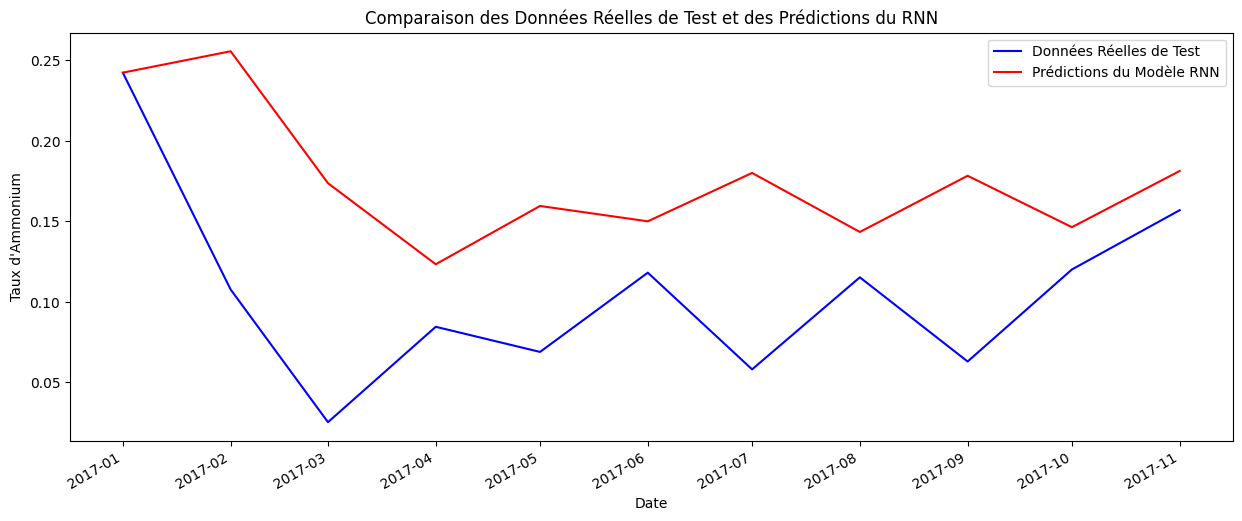

In [ ]:
import matplotlib.dates as mdates


# Dates correspondant aux données de test (de janvier à décembre 2017)
dates_test = pd.date_range(start='2017-01-01', periods=len(Y_test), freq='MS')

# Tracer les données réelles et les prédictions avec les dates
plt.figure(figsize=(15, 6))
plt.plot(dates_test, Y_test, label='Données Réelles de Test', color='blue')
plt.plot(dates_test, predicted, label='Prédictions du Modèle RNN', color='red')

# Formatage de l'axe des x pour afficher les dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())

# Rotation des dates pour une meilleure lisibilité
plt.gcf().autofmt_xdate()

# Ajouter des titres et des légendes
plt.title('Comparaison des Données Réelles de Test et des Prédictions du RNN')
plt.xlabel('Date')
plt.ylabel('Taux d\'Ammonium')
plt.legend()
plt.show()


Ce graphique met en évidence la capacité du modèle à suivre les tendances générales des données réelles, bien qu'il semble y avoir une certaine déviation, particulièrement visible dans les pics et les creux des séries temporelles.

## **question 6**

In [ ]:
import itertools
import warnings
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# Suppression des avertissements pour une sortie propre
warnings.filterwarnings("ignore")

# Définition des plages de valeurs pour p, d et q
p = d = q = range(0, 3)  # Par exemple, tester les valeurs 0, 1, 2
pdq_combinations = list(itertools.product(p, d, q))

# Définition de la métrique de performance
best_aic = float("inf")
best_pdq = None
best_model = None

# Recherche en grille
for combination in pdq_combinations:
    try:
        # Initialisation du modèle ARIMA avec les ordres testés
        model = ARIMA(donnees_entrainement['Ammonium'], order=combination)
        model_fit = model.fit()

        # Vérification si ce modèle a le meilleur AIC
        if model_fit.aic < best_aic:
            best_aic = model_fit.aic
            best_pdq = combination
            best_model = model_fit
    except Exception as e:
        continue  # En cas d'erreur avec certains paramètres, continuer avec les autres combinaisons

# Affichage des meilleurs paramètres
print(f"Meilleur modèle ARIMA: {best_pdq} avec AIC: {best_aic}")

# Utilisation du meilleur modèle pour faire des prédictions
predictions = best_model.forecast(steps=len(donnees_test['Ammonium']))
mse = mean_squared_error(donnees_test['Ammonium'], predictions)
rmse = sqrt(mse)

print(f"MSE du meilleur modèle ARIMA: {mse}")
print(f"RMSE du meilleur modèle ARIMA: {rmse}")


Meilleur modèle ARIMA: (1, 0, 2) avec AIC: -984.5783350310394
MSE du meilleur modèle ARIMA: 0.0008820388452162711
RMSE du meilleur modèle ARIMA: 0.029699138795868663



Pour effectuer une comparaison entre le modèle RNN et le modèle ARIMA (1,0,2), nous prendrons en compte les métriques de performance telles que le Mean Squared Error (MSE) et le Root Mean Squared Error (RMSE), ainsi que les critères de sélection de modèles comme l'Akaike Information Criterion (AIC).

**Modèle RNN:**

MSE: 0.007724101844610615
RMSE: 0.08788686958022009

**Modèle ARIMA (1,0,2):**

AIC: -984.5783350310394
MSE: 0.0008820388452162711
RMSE: 0.029699138795868663

**Comparaison des Métriques:**

MSE:
Le modèle ARIMA a un MSE significativement plus bas que le modèle RNN, ce qui suggère que les prédictions d'ARIMA sont en moyenne plus proches des valeurs réelles.

RMSE:
De même, le RMSE plus faible de l'ARIMA indique que les erreurs de prédiction sont moins dispersées et, par conséquent, que les prédictions sont plus précises en termes d'erreur standard.

AIC:
 L'AIC est une mesure de la qualité relative des modèles statistiques pour un ensemble donné de données. Comme le modèle ARIMA a un AIC négatif et assez élevé (en valeur absolue), cela indique que le modèle a une bonne qualité d'ajustement par rapport au nombre de paramètres utilisés.

**Analyse et Interprétation:**
Sur la base des métriques de performance, le modèle ARIMA (1,0,2) semble être supérieur au modèle RNN pour cette série temporelle spécifique. Il fournit des prédictions plus précises avec des erreurs moins importantes. Cela pourrait être dû à la nature des séries temporelles analysées : si les données ont des caractéristiques fortes et bien définies que les modèles ARIMA sont particulièrement bons pour capturer (comme la saisonnalité, la tendance, etc.), alors ARIMA pourrait bien se comporter par rapport aux RNN.

## **question 7**

En conclusion, le travail présenté ici a impliqué le développement et la comparaison de modèles de séries temporelles pour prédire les taux d'ammonium.

Les modèles examinés comprenaient un réseau de neurones récurrents (RNN) et un modèle ARIMA calibré pour optimiser les prédictions.

Le modèle ARIMA (1,0,2) s'est révélé supérieur au modèle RNN en termes de MSE et de RMSE, indiquant une meilleure adéquation aux données testées.

Cela peut être attribué à la capacité des modèles ARIMA à capturer efficacement les relations linéaires et les tendances saisonnières dans les séries temporelles qui sont relativement stables et ne présentent pas de dynamiques complexes.

**Recommandations:**

*   Exploration des Hyperparamètres: Pour le RNN, une exploration plus approfondie des hyperparamètres pourrait potentiellement améliorer la performance.

*   Inclusion de Données Exogènes: Si des données exogènes sont disponibles, elles pourraient être incorporées pour améliorer la précision des prédictions, surtout dans les RNN qui sont bien équipés pour gérer plusieurs types de signaux d'entrée.

*   Tests de Modèles Supplémentaires: Tester d'autres modèles de séries temporelles comme SARIMA, SARIMAX, ou des variantes de RNN comme LSTM ou GRU pour voir s'ils offrent une meilleure performance.

*   Analyse de Composants: Une analyse des composants de la série temporelle (tendance, saisonnalité, résidu) pourrait fournir une meilleure compréhension des dynamiques sous-jacentes et aider à affiner les modèles.

**Remarques:**

*   Interprétabilité vs Performance: Alors que le modèle ARIMA offre une meilleure interprétabilité, il est important de considérer si la complexité supplémentaire d'un RNN pourrait capturer des effets que les modèles linéaires ne peuvent pas.

*   Validation Croisée: La validation croisée est une étape cruciale pour évaluer la performance des modèles sur des séries temporelles et n'a pas été mentionnée ici. Elle devrait être considérée dans les études futures.

*   Surapprentissage: Il y a un risque de surapprentissage avec les RNN, en particulier lorsque le nombre d'époques est élevé ou que le réseau est complexe. Une attention particulière doit être portée à la régularisation et aux techniques de validation pour éviter ce problème.

Ainsi le modèle RNN pourrait être amélioré sur ces trois points suivants:

**Optimisation des hyperparamètres :**

On pourrait utiliser des techniques comme la recherche en grille (GridSearch) ou la recherche aléatoire (RandomSearch) pour expérimenter avec différents nombres d'unités RNN, taux d'apprentissage, fonctions d'activation, et d'autres hyperparamètres.

**Architecture du réseau :**
On pourrait tester différentes architectures de réseaux récurrents, comme les RNN empilés (Stacked RNNs), où plusieurs couches RNN sont superposées, ou les architectures bidirectionnelles (Bidirectional RNNs), qui peuvent capturer des dépendances dans les deux sens temporels.

**Variantes avancées de RNN :**

Les Long Short-Term Memory networks (LSTMs) et les Gated Recurrent Units (GRUs) sont des variantes de RNN qui sont capables de capturer des dépendances à long terme plus efficacement et sont moins susceptibles au problème de disparition du gradient.